******DON'T FORGET TO UPVOTE******

In [ ]:
#for visualization

import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
#read image path

import pathlib
from pathlib import Path


#for image processing


from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from PIL import Image
#for model

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_path=pathlib.Path('/kaggle/input/yoga-16/yoga16-dataset/train')
test_path=pathlib.Path('/kaggle/input/yoga-16/yoga16-dataset/test')
val_path=pathlib.Path('/kaggle/input/yoga-16/yoga16-dataset/val')

In [6]:
image_classes=os.listdir(train_path)
image_classes

['tree_pose',
 'downward-facing_dog_pose',
 'goddess_pose',
 'low_lunge_pose',
 'warrior_1_pose',
 'staff_pose',
 'warrior_2_pose',
 'dolphin_plank_pose',
 'seated_forward_bend_pose',
 'lord_of_the_dance_pose',
 'warrior_3_pose',
 'side_plank_pose',
 'locust_pose',
 'fish_pose',
 'wide-angle_seated_forward_bend_pose',
 'chair_pose']

In [7]:
def plot_images (image_classes):
    
    plt.figure(figsize=(12,12))
    
    for i, category in enumerate (image_classes):
        
        image_path= train_path / category
        image_in_folder=os.listdir(image_path)
        
        first_image=image_in_folder[0]
        first_image_path=image_path / first_image
        
        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img) / 255
        
        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
        
plt.show()    

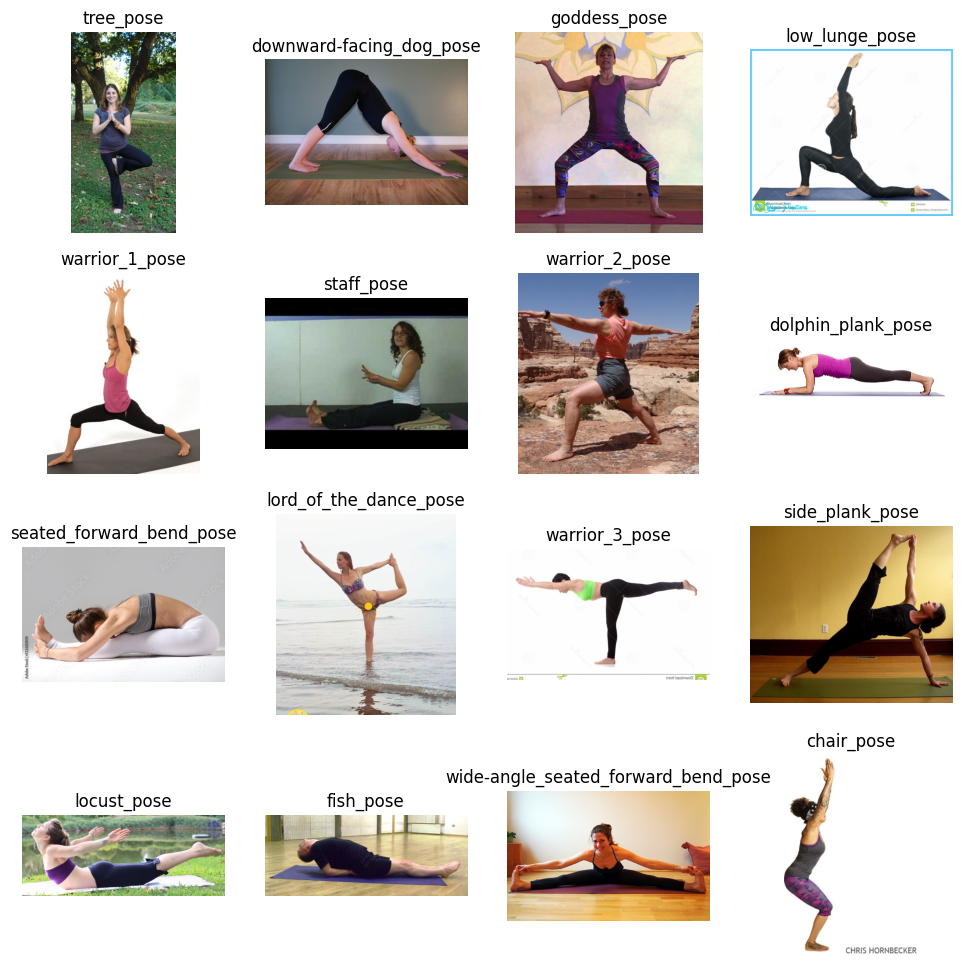

In [8]:
 plot_images(image_classes)

In [16]:
image_generator=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [15]:
train_data=image_generator.flow_from_directory(train_path,
                                               target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='categorical',
                                              subset='training')


Found 720 images belonging to 16 classes.


In [19]:
test_data=image_generator.flow_from_directory(train_path,
                                               target_size=(224,224),
                                              batch_size=1,
                                              shuffle=False,
                                              class_mode='categorical',
                                              subset='validation')

Found 176 images belonging to 16 classes.


In [20]:
print(test_data.image_shape)
print(train_data.image_shape)

(224, 224, 3)
(224, 224, 3)


In [24]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

# Output Layer for 16 classes
model.add(Dense(16, activation='softmax'))

In [23]:
###### model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,649,680 (25.37 MB)

 Trainable params: 6,649,680 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
model_history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10


I0000 00:00:1739270199.442553     149 service.cc:145] XLA service 0x7de1a40040a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739270199.442621     149 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1739270199.442626     149 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/23 ━━━━━━━━━━━━━━━━━━━━ 6:03 17s/step - accuracy: 0.0312 - loss: 2.7838

I0000 00:00:1739270211.795553     149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 657ms/step - accuracy: 0.0486 - loss: 3.1149 - val_accuracy: 0.1420 - val_loss: 2.7666
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.1535 - loss: 2.7234 - val_accuracy: 0.3750 - val_loss: 2.4450
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.4144 - loss: 2.0782 - val_accuracy: 0.5057 - val_loss: 1.7832
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5581 - loss: 1.4828 - val_accuracy: 0.5341 - val_loss: 1.7441
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.7069 - loss: 0.9705 - val_accuracy: 0.5341 - val_loss: 1.9156
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.8347 - loss: 0.5485 - val_accuracy: 0.5739 - val_loss: 1.8829
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.8878 - loss: 0.3835 - val_accuracy: 0.5682 - val_loss: 1.8582
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.9227 - loss: 0.2622 - val_accuracy: 0.5852 - val

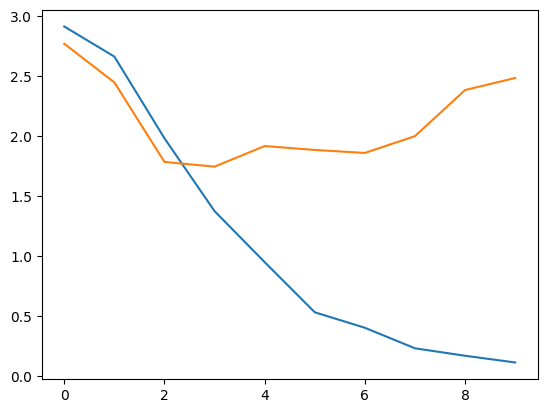

In [31]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')

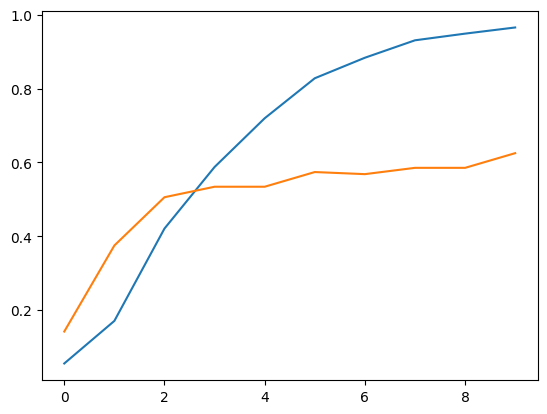

In [32]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

In [33]:
model.evaluate(train_data)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 1.0000 - loss: 0.0053


[0.007260986603796482, 1.0]

In [34]:
model.evaluate(test_data)

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6046 - loss: 3.2973


[2.4817309379577637, 0.625]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


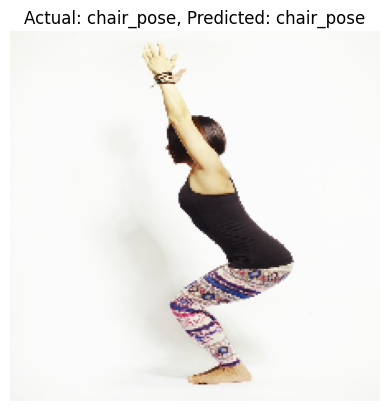

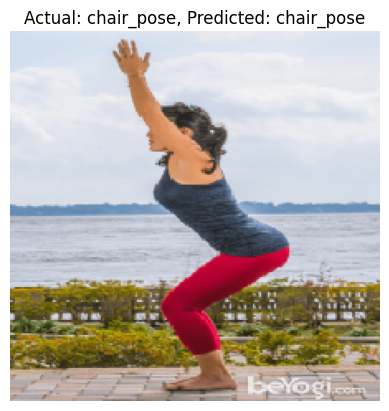

In [35]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  
actual_classes = test_data.classes             


class_labels = list(test_data.class_indices.keys())  # Class names

for i in range(2):
    img, label = test_data[i] 
    actual_label = class_labels[actual_classes[i]]
    predicted_label = class_labels[predicted_classes[i]]

    plt.imshow(img[0])
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()